 # 4. Functions as Sets of Pairs

In [2]:
from spb import plot
from spb.defaults import cfg
from sympy import (
    And,
    ConditionSet,
    Contains,
    cos,
    EmptySet,
    Eq,
    Equivalent,
    exp,
    FiniteSet,
    Function,
    Implies,
    Intersection,
    log,
    Or,
    pi,
    ProductSet,
    sin,
    sqrt,
    Symbol,
    Union
)
from sympy.core.basic import Basic

cfg["matplotlib"]["show_minor_grid"] = True

In [3]:
X = FiniteSet()
x = Symbol('x')

A = FiniteSet()
B = FiniteSet()

Equivalent(
    Eq(A, B),
    And(*[Equivalent(Contains(x, A), Contains(x, B)) for x in X])
)

True

In [4]:
C = FiniteSet()

Implies(
    Eq(A, B),
    And(*[Implies(Contains(A, C), Contains(B, C)) for C in C])
)

True

In [5]:
a = FiniteSet('a')
b = FiniteSet('b')

Equivalent(
    Contains(x, FiniteSet(a, b)),
    Or(Eq(x, a), Eq(x, b))
)

True

In [6]:
ordered_ab = FiniteSet(a, Union(a, b))
ordered_ab

FiniteSet({a}, {a, b})

In [7]:
a_p = FiniteSet('aʼ')
b_p = FiniteSet('bʼ')

Equivalent(
    Eq(ordered_ab, FiniteSet(a_p, Union(a_p, b_p))),
    And(Eq(a, a_p), Eq(b, b_p))
)

Equivalent(Eq({a}, {aʼ}) & Eq({b}, {bʼ}), Eq(FiniteSet({a}, {a, b}), FiniteSet({aʼ}, {aʼ, bʼ})))

In [8]:
Y = FiniteSet()
y = Symbol('y')

Eq(
    ProductSet(X, Y),
    FiniteSet(*[FiniteSet(x, Union(x, y)) for x in X for y in Y])
)

True

 > **Definition.** A *function f* on the set *X* to the set *Y* is a set *S ⊂ X × Y* of ordered pairs which to each *x ⊂ X* contains exactly one ordered pair <*x,y*> with first component *x*. The second component of this pair is the value of the function *f* at the argument *x*, written *f(x)*. We call *X* the *domain* and *Y* the *codomain* of the function *f*.

In [9]:
X2 = FiniteSet(1, 2, 3)
Y2 = FiniteSet(*[x*2 for x in X2])

class Func(Basic):

    domain = None
    codomain = None
    S = None

    def __init__(self, X, Y):
        self.domain = FiniteSet(*[x for x in X])
        self.codomain = FiniteSet(*[y for y in Y])
        self.S = FiniteSet(*[
            FiniteSet(xy[0], FiniteSet(xy[0], xy[1]))
            for xy
            in zip(X, Y)
        ])

    def _latex(self, printer):
        return printer.doprint(self.S)

    def __mul__(self, other):
        overlap = Intersection(self.domain, other.codomain)
        new_domain = FiniteSet(*[
            y.args[0]
            for y in other.pairs()
            if (len(y.args) == 1 and y.args[0] in overlap) or y.args[1] in overlap
        ])
        new_codomain = FiniteSet(*[
            j for i
            in [
                [
                    x for x in y.args[0]
                    if (x != y.args[1] or len(y.args[0]) == 1) and y.args[1] in overlap
                ]
                for y in self.S
            ]
            for j in i
        ])
        return Func(new_domain, new_codomain)

    def _sympy_(self):
        return FiniteSet()

    def pairs(self):
        return [z.args[0] for z in self.S.args]

    def apply(self, z):
        if z in self.domain:
            fy = [
                j for i
                in [
                    [
                        x for x in y.args[0]
                        if (
                            (x != y.args[1] or len(y.args[0]) == 1) and
                            z == y.args[1]
                        )
                    ]
                    for y in self.S
                ]
                for j in i
            ]
            return fy[0]
        else:
            return EmptySet

    def product(self):
        return ProductSet(self.domain, self.codomain)


f1 = Func(X2, Y2)
f1

Func({1, 2, 3}, {2, 4, 6})

In [10]:
f1.product()

ProductSet({1, 2, 3}, {2, 4, 6})

In [11]:
f1.domain

{1, 2, 3}

In [12]:
f1.codomain

{2, 4, 6}

 > ... two functions are equal if and only if they have the same domain, the same codomain, and the same values.

In [13]:
g1 = Func(X2, Y2)
g1

Func({1, 2, 3}, {2, 4, 6})

In [14]:
Equivalent(
    Eq(f1, g1),
    And(*[Eq(f1.apply(x), g1.apply(x)) for x in f1.domain])
)

True

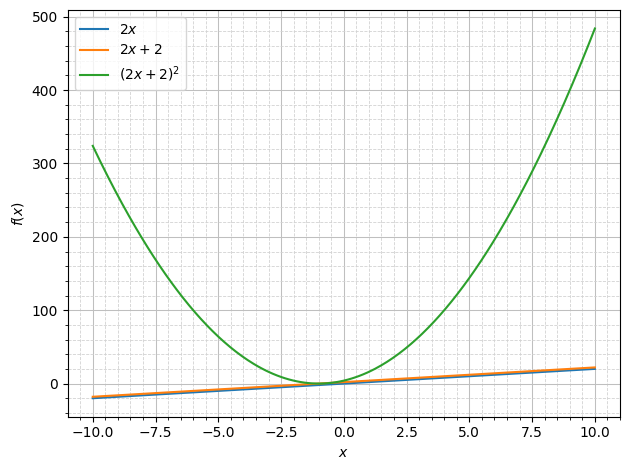

In [15]:
plot(
    2*x,
    2*x + 2,
    (2*x + 2)**2
)

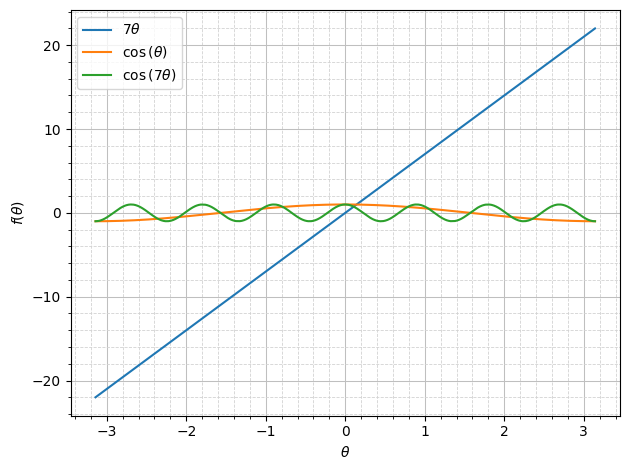

In [16]:
theta = Symbol('θ')

plot(
    7*theta,
    cos(theta),
    cos(7 * theta),
    (theta, -pi, pi)
)

In [17]:
g2 = Func(Y2, X2)
g2

Func({2, 4, 6}, {1, 2, 3})

In [18]:
Eq(f1.codomain, g2.domain)

True

In [19]:
Eq(g2.codomain, f1.domain)

True

In [20]:
h = (g2*f1)
h

Func({1, 2, 3}, {1, 2, 3})

In [21]:
And(*[Eq((g2*f1).apply(x), g2.apply(f1.apply(x))) for x in X2])

True

In [22]:
Eq((g2*f1).domain, f1.domain)

True

In [23]:
Eq((g2*f1).codomain, g2.codomain)

True

In [24]:
X3 = [1, 2, 3]
Y3 = [x**2 for x in X3]
Z3 = [y+5 for y in Y3]
W3 = [z-2 for z in Z3]

f3 = Func(X3, Y3)
g3 = Func(Y3, Z3)
h3 = Func(Z3, W3)

Eq(h3*(g3*f3), (h3*g3)*f3)

True

In [25]:
f3

Func([1, 2, 3], [1, 4, 9])

In [26]:
g3

Func([1, 4, 9], [6, 9, 14])

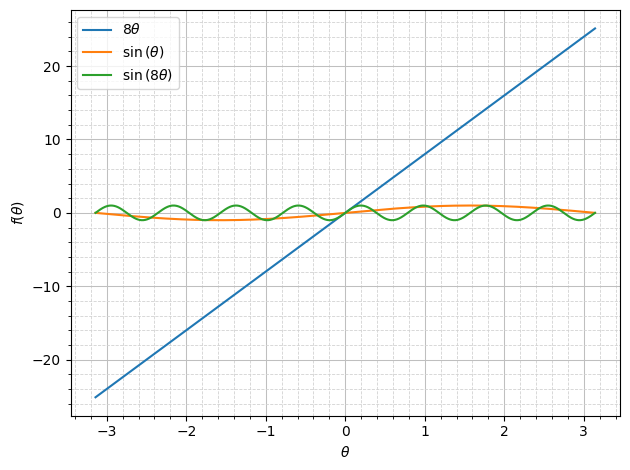

In [27]:
plot(
    8*theta,
    sin(theta),
    sin(8*theta),
    (theta, -pi, pi)
)

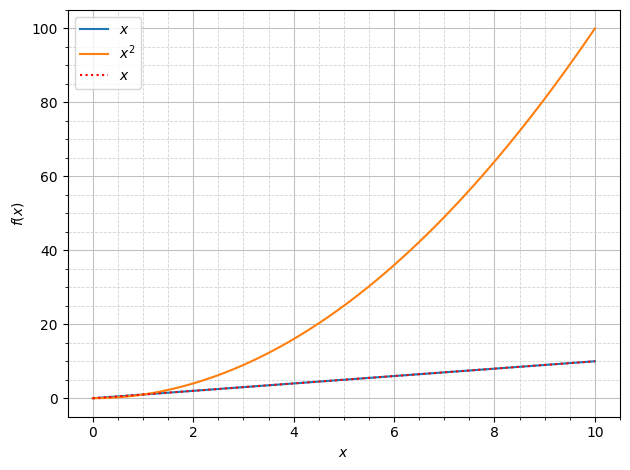

In [28]:
plot(
    x,
    x**2,
    sqrt(x)**2,
    (x, 0, 10),
    rendering_kw=[{}, {}, {"linestyle": ":", "color": "red"}]
)

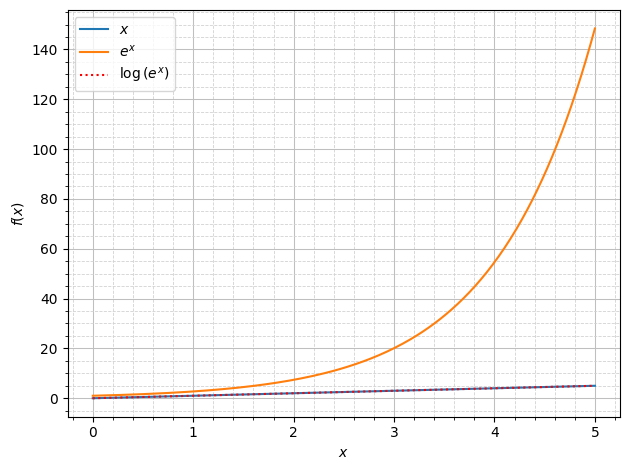

In [29]:
plot(
    x,
    exp(x),
    log(exp(x)),
    (x, 0, 5),
    rendering_kw=[{}, {}, {"linestyle": ":", "color": "red"}]
)

In [30]:
X4 = FiniteSet(*range(10))
X4

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [31]:
XX = ProductSet(X4, X4)
XX

ProductSet({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

In [32]:
delta = FiniteSet(*[xx for xx in XX if xx[0] == xx[1]])
delta

{(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)}

In [33]:
Y4 = FiniteSet(*[x**2 for x in X4])
Y4

{0, 1, 4, 9, 16, 25, 36, 49, 64, 81}

In [34]:
f4 = Func(X4, Y4) # right inverse
g4 = Func(Y4, X4) # left inverse

Eq((g4*f4).codomain, X4)

True

<lambdifygenerated-17>:2: RuntimeWarning: divide by zero encountered in log
  return log(x)/log(10)
/home/zhanmusi/.virtualenvs/mfaf/lib/python3.11/site-packages/adaptive/learner/learner1D.py:573: RuntimeWarning: invalid value encountered in subtract
  self._scale[1] = np.max(y_max - y_min)
/home/zhanmusi/.virtualenvs/mfaf/lib/python3.11/site-packages/adaptive/learner/learner1D.py:448: RuntimeWarning: invalid value encountered in divide
  return y / y_scale


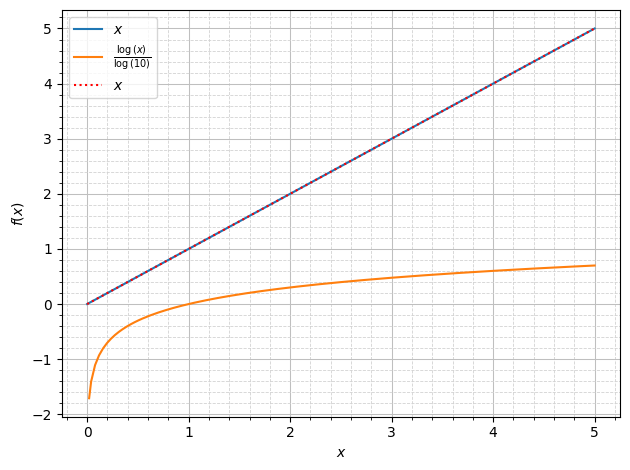

In [35]:
plot(
    x,
    log(x, 10),
    10**(log(x, 10)),
    (x, 0, 5),
    rendering_kw=[{}, {}, {"linestyle": ":", "color": "red"}]
)

In [36]:
And(
    Eq((g4*f4).codomain, X4),
    Eq((f4*g4).codomain, Y4),
    Eq(len(X4), len(Y4))
)

True

 **injection**:
 > ... an injection maps the set *X* in one-to-one fashion onto some subset of *Y*, called the *image* of *f*.

In [37]:
Eq(len(FiniteSet(*[f4.apply(x) for x in X4])), len(X4))

True

 **surjection**:
 > A function *f*: *X -> Y* is a *surjection* when to each *y* ∈ *Y* there is at least one element *x* ∈ *X* with *fx* = *y*.

In [38]:
Eq(FiniteSet(*[f4.apply(x) for x in X4]), Y4)

True

 **bijection**:
 > ... a function *f*: *X -> Y* is a *bijection* if and only if it is both an injection and a surjection: that is, if and only if there exists to each *y* ∈ *Y* exactly one *x* ∈ *X* with *fx* = *y*. Thus a bijection establishes a one-to-one correspondence between the elements of *X* and those of *Y*. A function *f* is a bijection if and only if it has a two sided inverse.

In [39]:
And(
    Eq(len(X4), len(Y4)),
    Eq(FiniteSet(*[f4.apply(x) for x in X4]), Y4)
)

True

In [40]:
X5 = [x for x in range(10)]
Y5 = [x % 2 for x in X5]

p = Func(X5, Y5)
p

Func([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [41]:
x = 0
y = 2

xEfy = Eq(p.apply(0), p.apply(y))
xEfy

True

In [42]:
xp = Symbol('x`')

[p.apply(x) for x in [xp for xp in X5 if Eq(p.apply(xp), p.apply(x))]]

[0, 0, 0, 0, 0]